# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [33]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.boxplot as cploboxp
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.normality as cplonorm
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [34]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.6.0' != container_version='1.7.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask455_Unit_test_plot_qq_function'
  hash='26f618644'
  # Last commits:
    *   26f618644 Samarth  update                                                            (  18 hours ago) Mon Sep 25 20:48:07 2023  (HEAD -> SorrTask455_Unit_test_plot_qq_function, origin/SorrTask455_Unit_test_plot_qq_function)
    |\  
    | * 23cf1783a Henry Wu Sorr task568 convert contributor scoring gdoc to markdown (#570)  (  28 hours ago) Mon Sep 25 10:41:09 2023  (origin/master, origin/HEAD, master)
    | * 01eb0d679 Henry Wu Sorr task459 unit test plot slippage boxplot() (#571)             (

# Build config

In [35]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Test data

In [36]:
test_df = cptetepl.Test_plots.get_test_plot_df1()
test_srs = cptetepl.Test_plots.get_test_plot_srs1()

# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [42]:
lag = 7

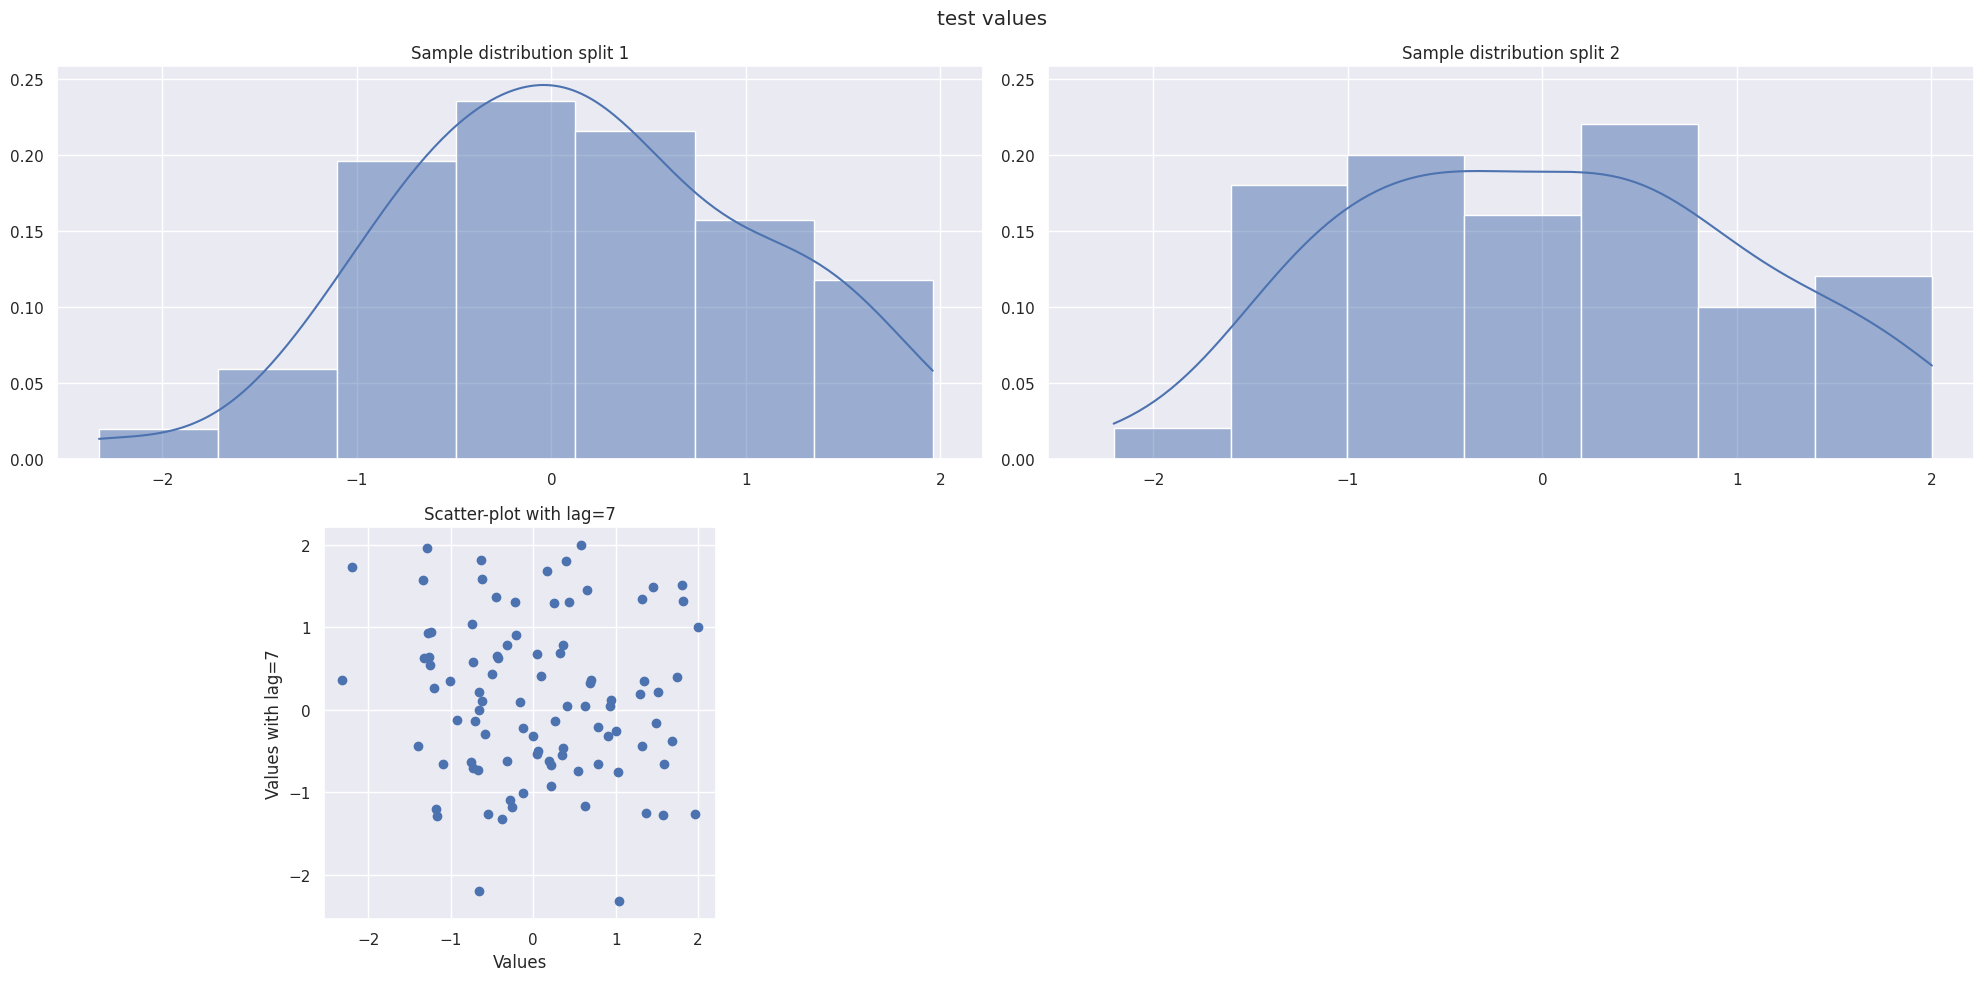

In [39]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

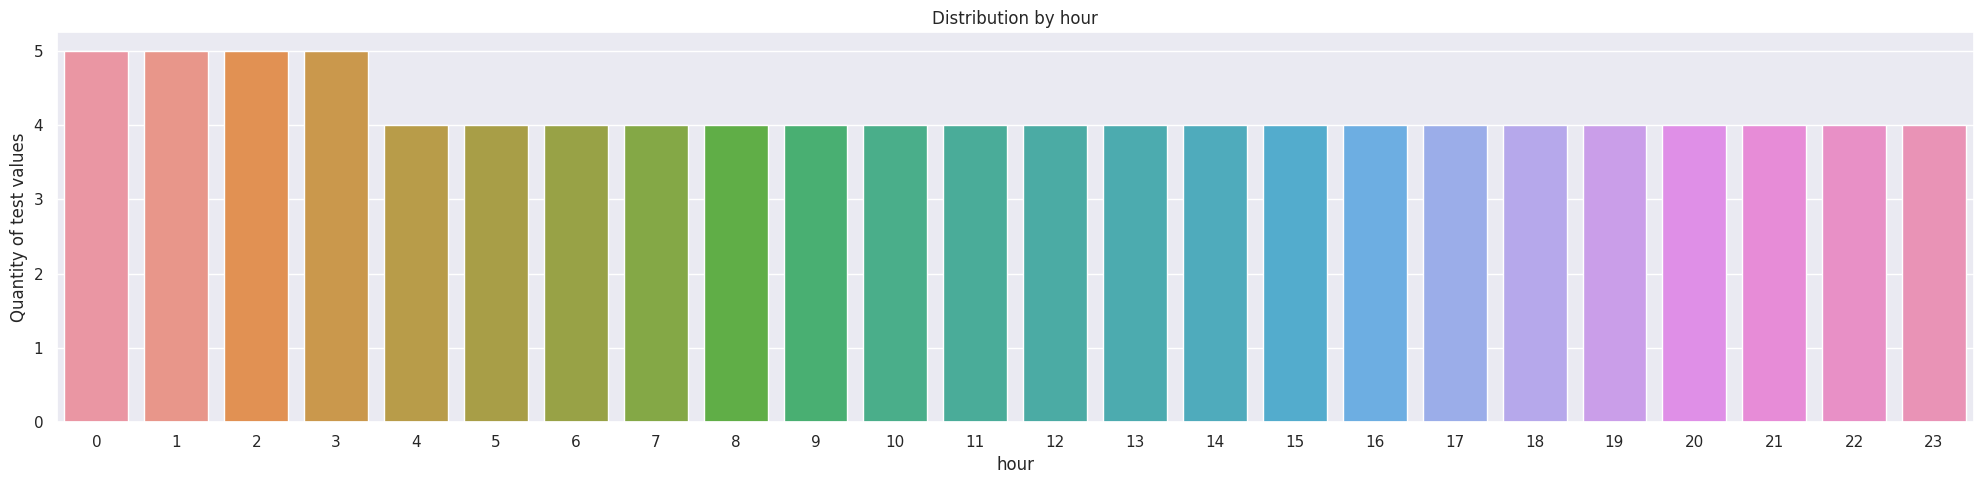

In [43]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

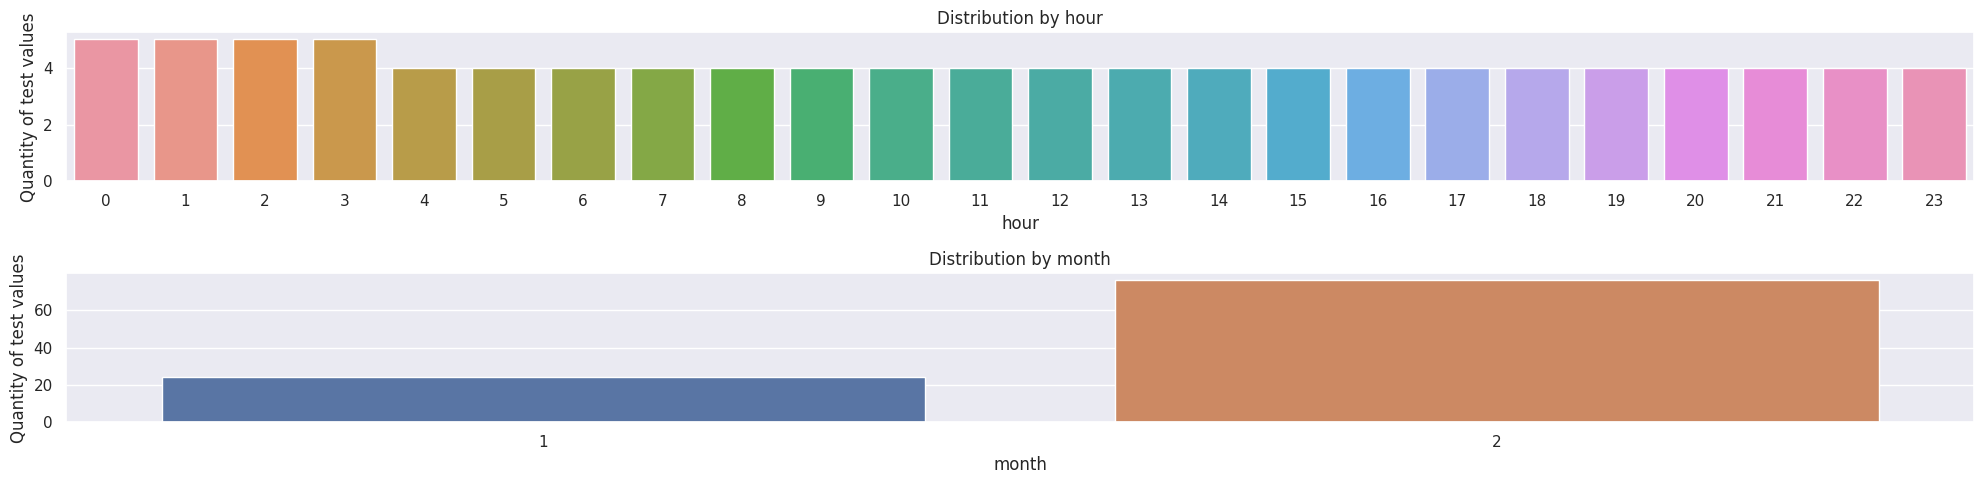

In [44]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


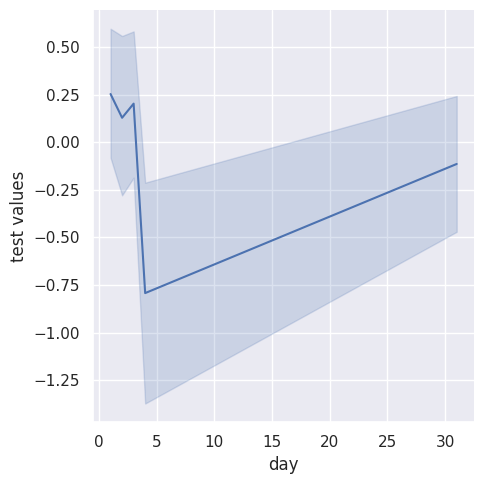

In [47]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


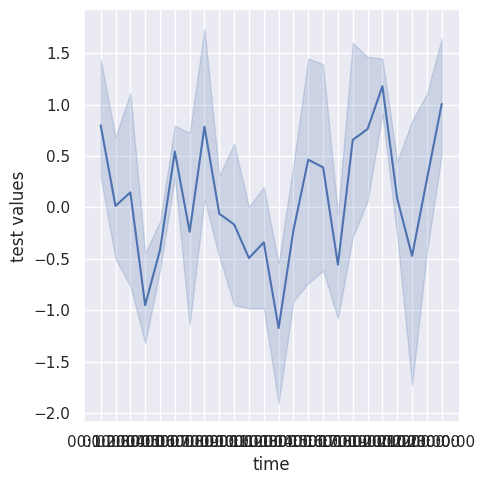

In [48]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [49]:
mode = "clustermap"

WARNING The corr_df.shape[0]='100' > 20


/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


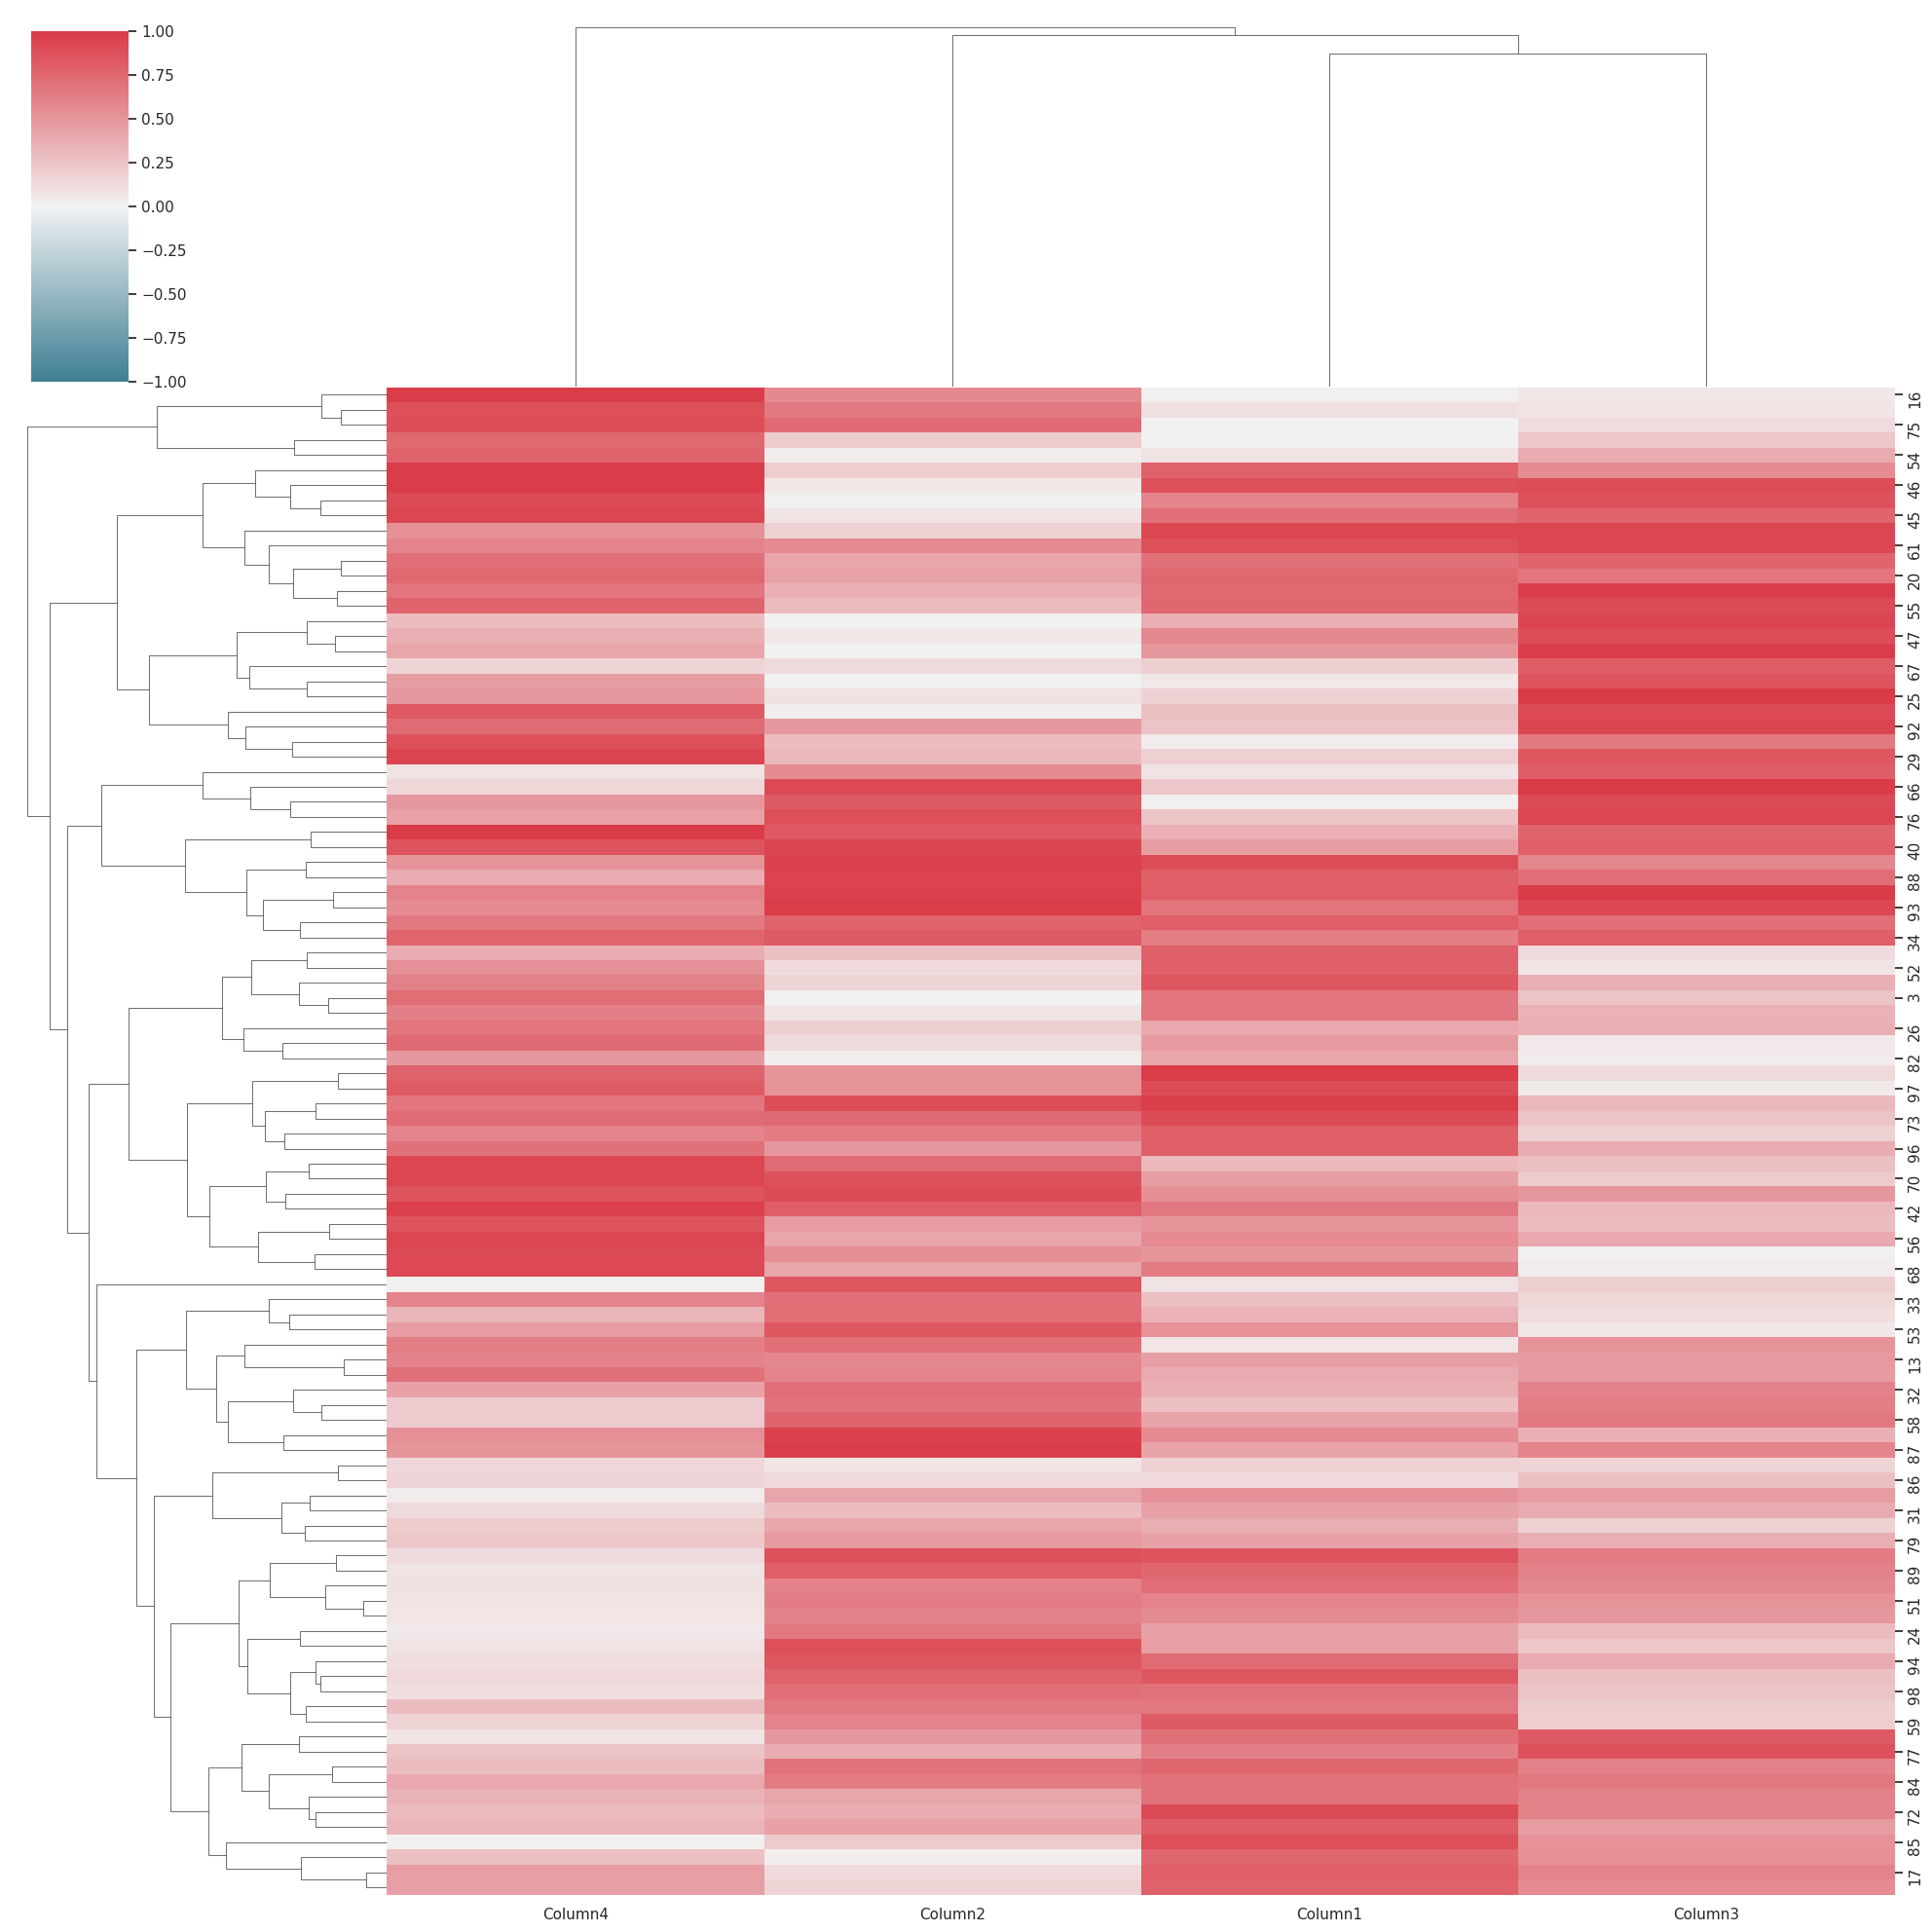

In [50]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [51]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.530GB vms=3.980GB mem_pct=2%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.531GB vms=3.980GB mem_pct=2%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


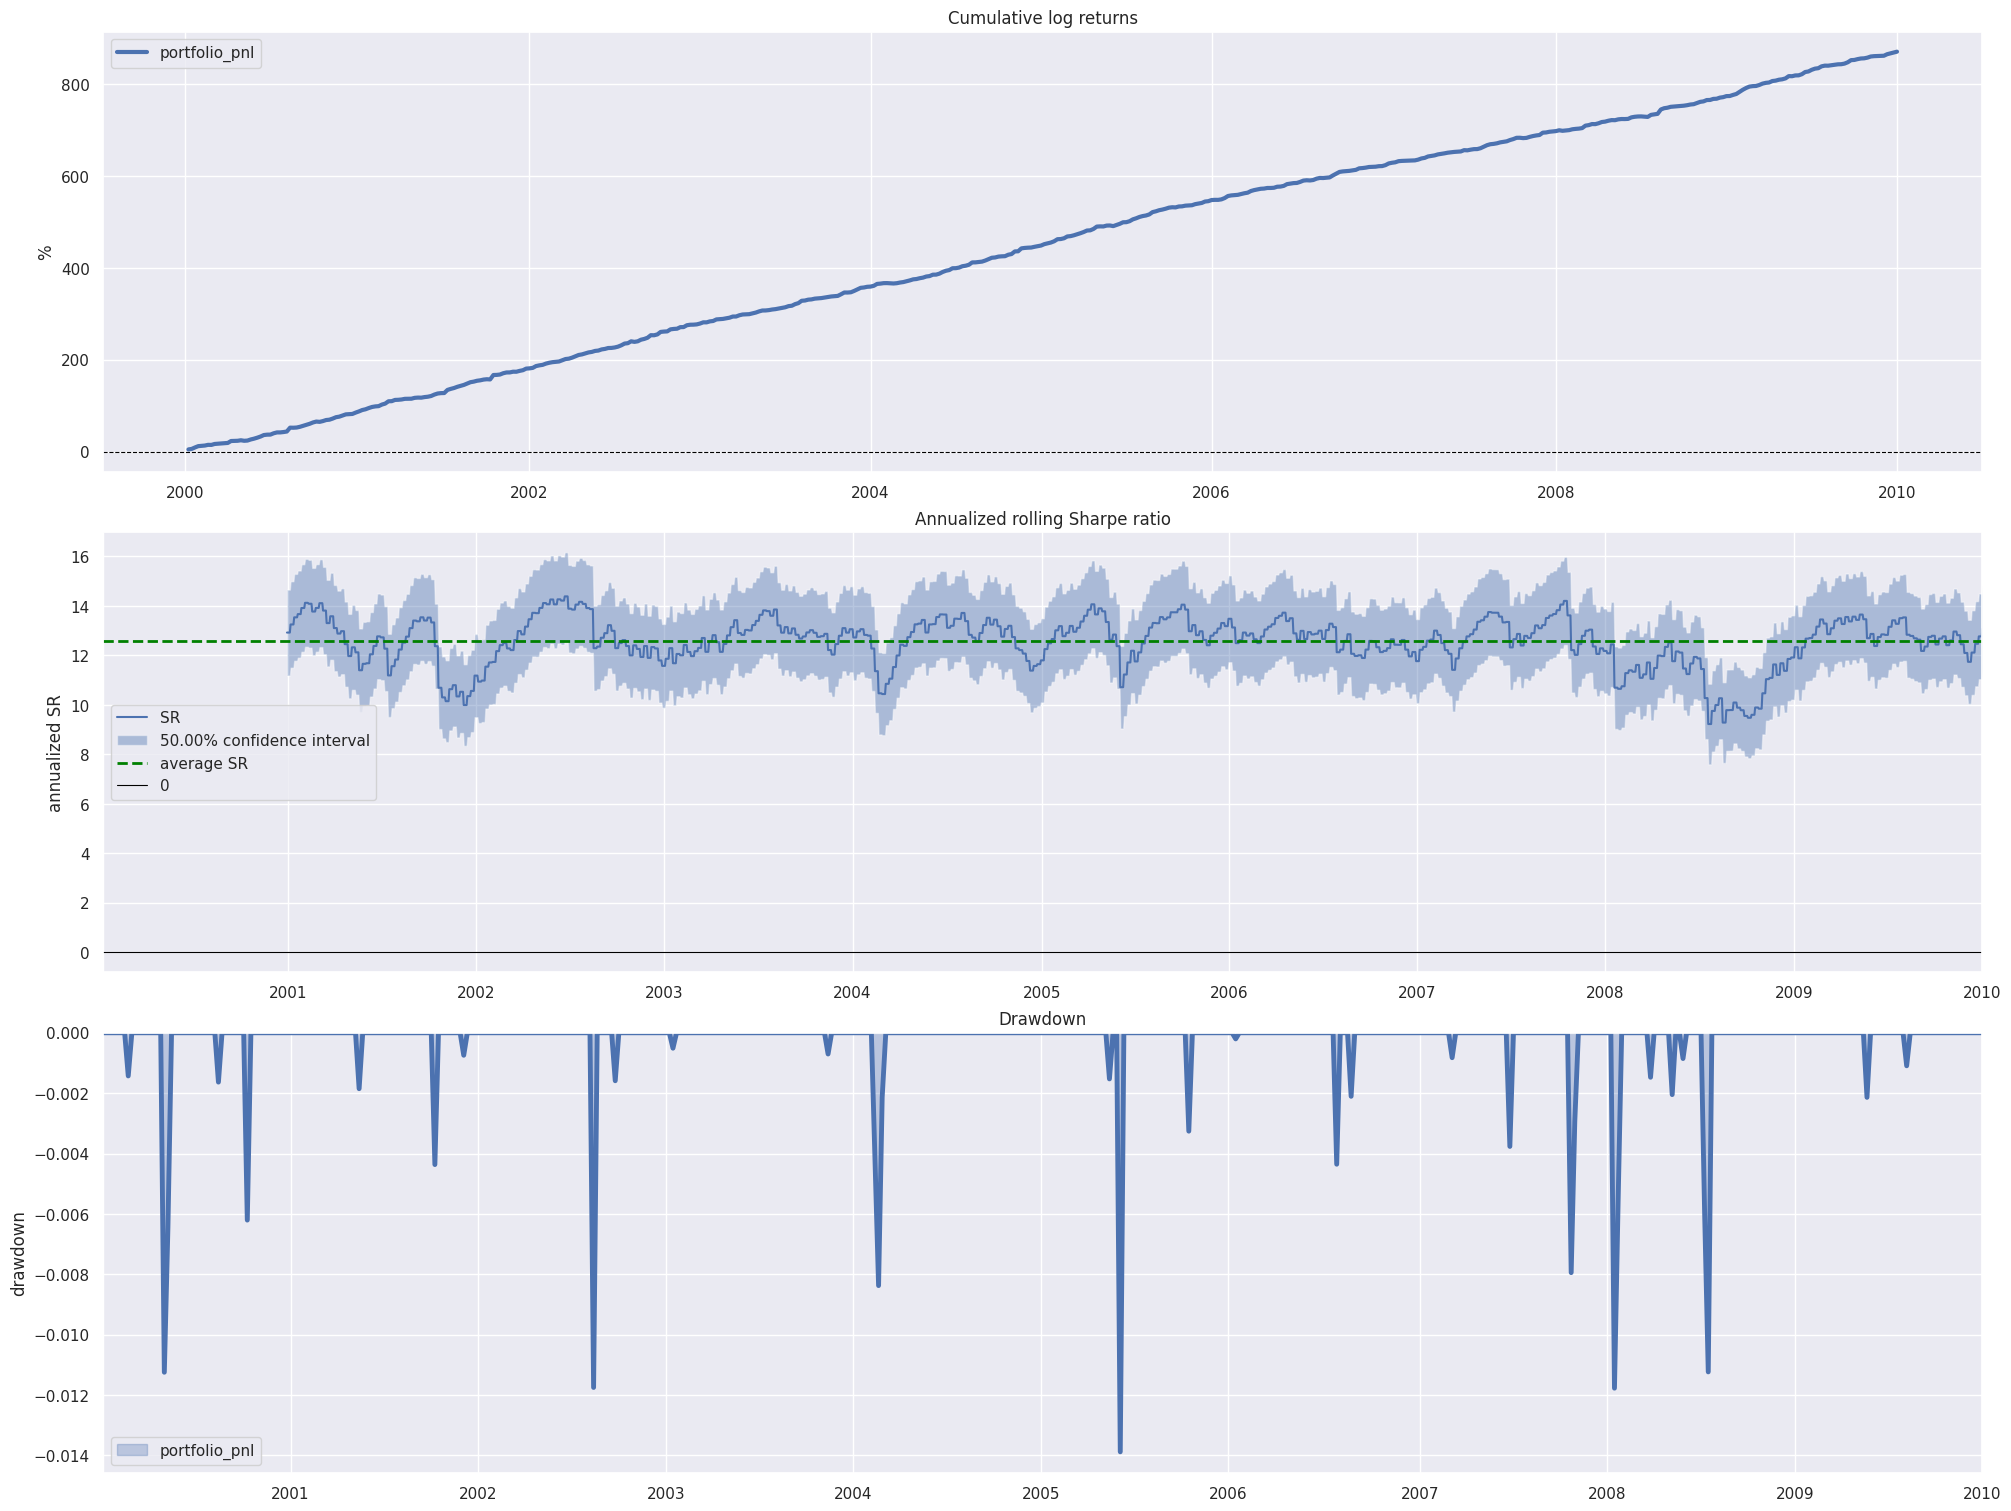

In [52]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [53]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.505GB vms=3.954GB mem_pct=2%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.505GB vms=3.954GB mem_pct=2%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


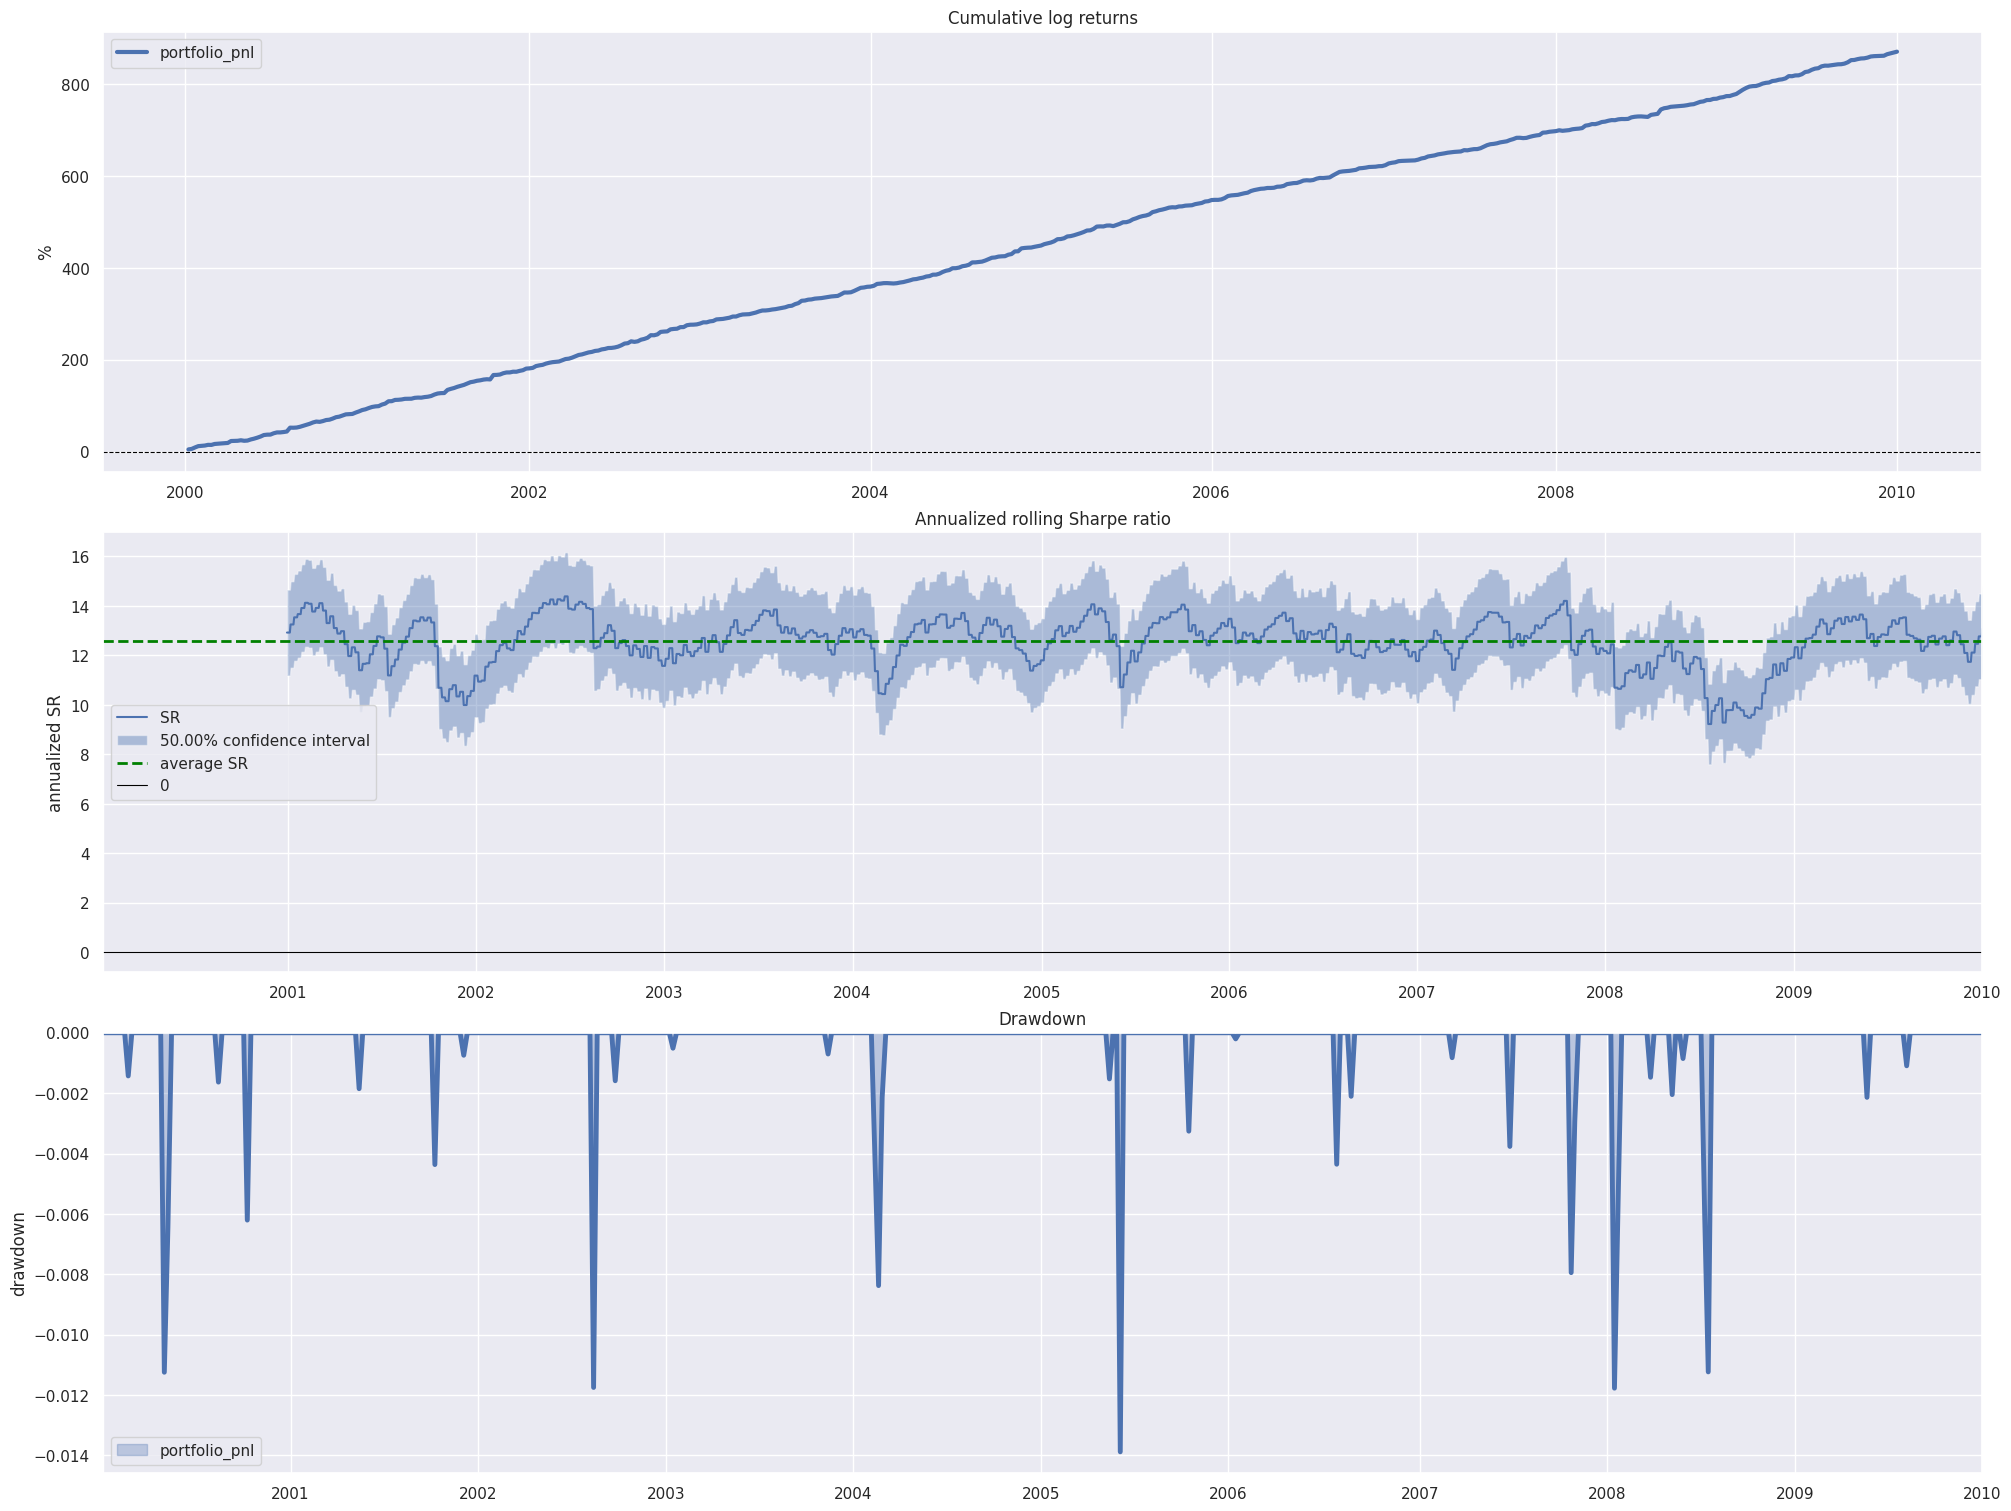

In [54]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

[3.9788708494245255, 3.958441913710839, 3.5433126864161313]

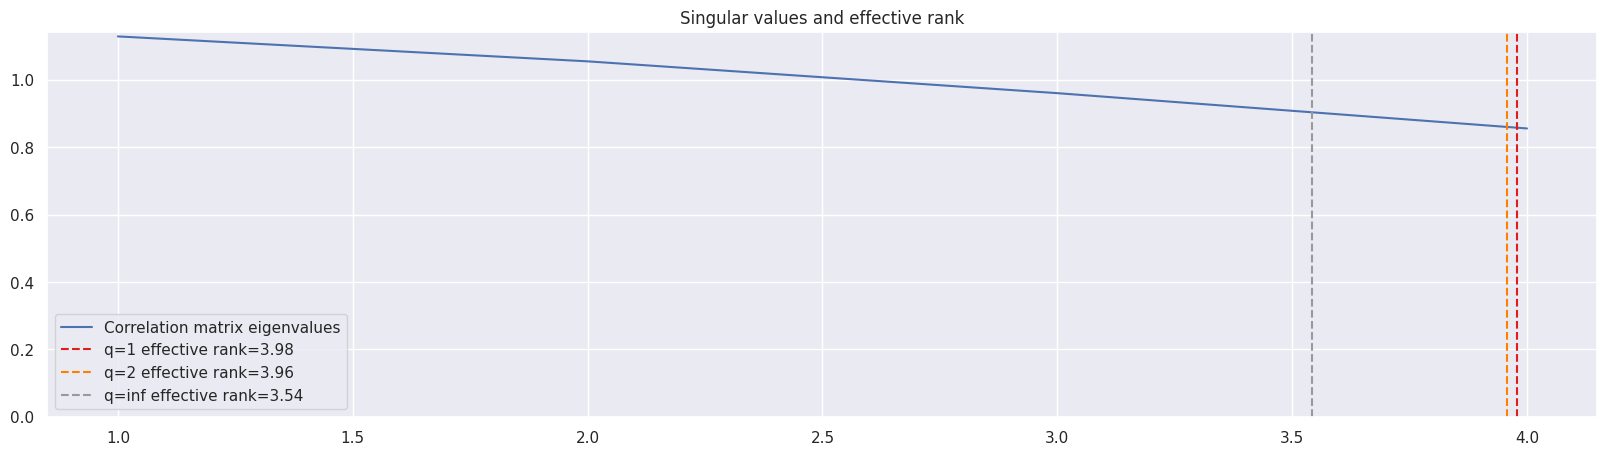

In [55]:
cplocorr.plot_effective_correlation_rank(test_df)

[3.9749965465739328,
 3.909489862795681,
 3.8334618057197725,
 3.8866865800162596,
 3.9686877473837607]

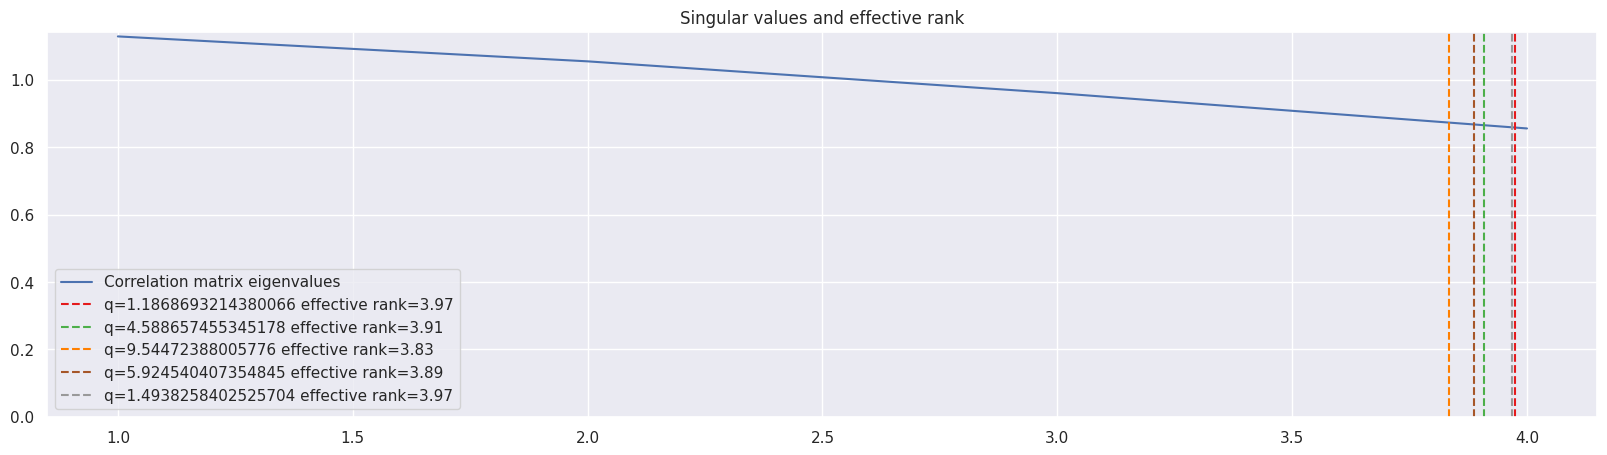

In [56]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

/venv/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


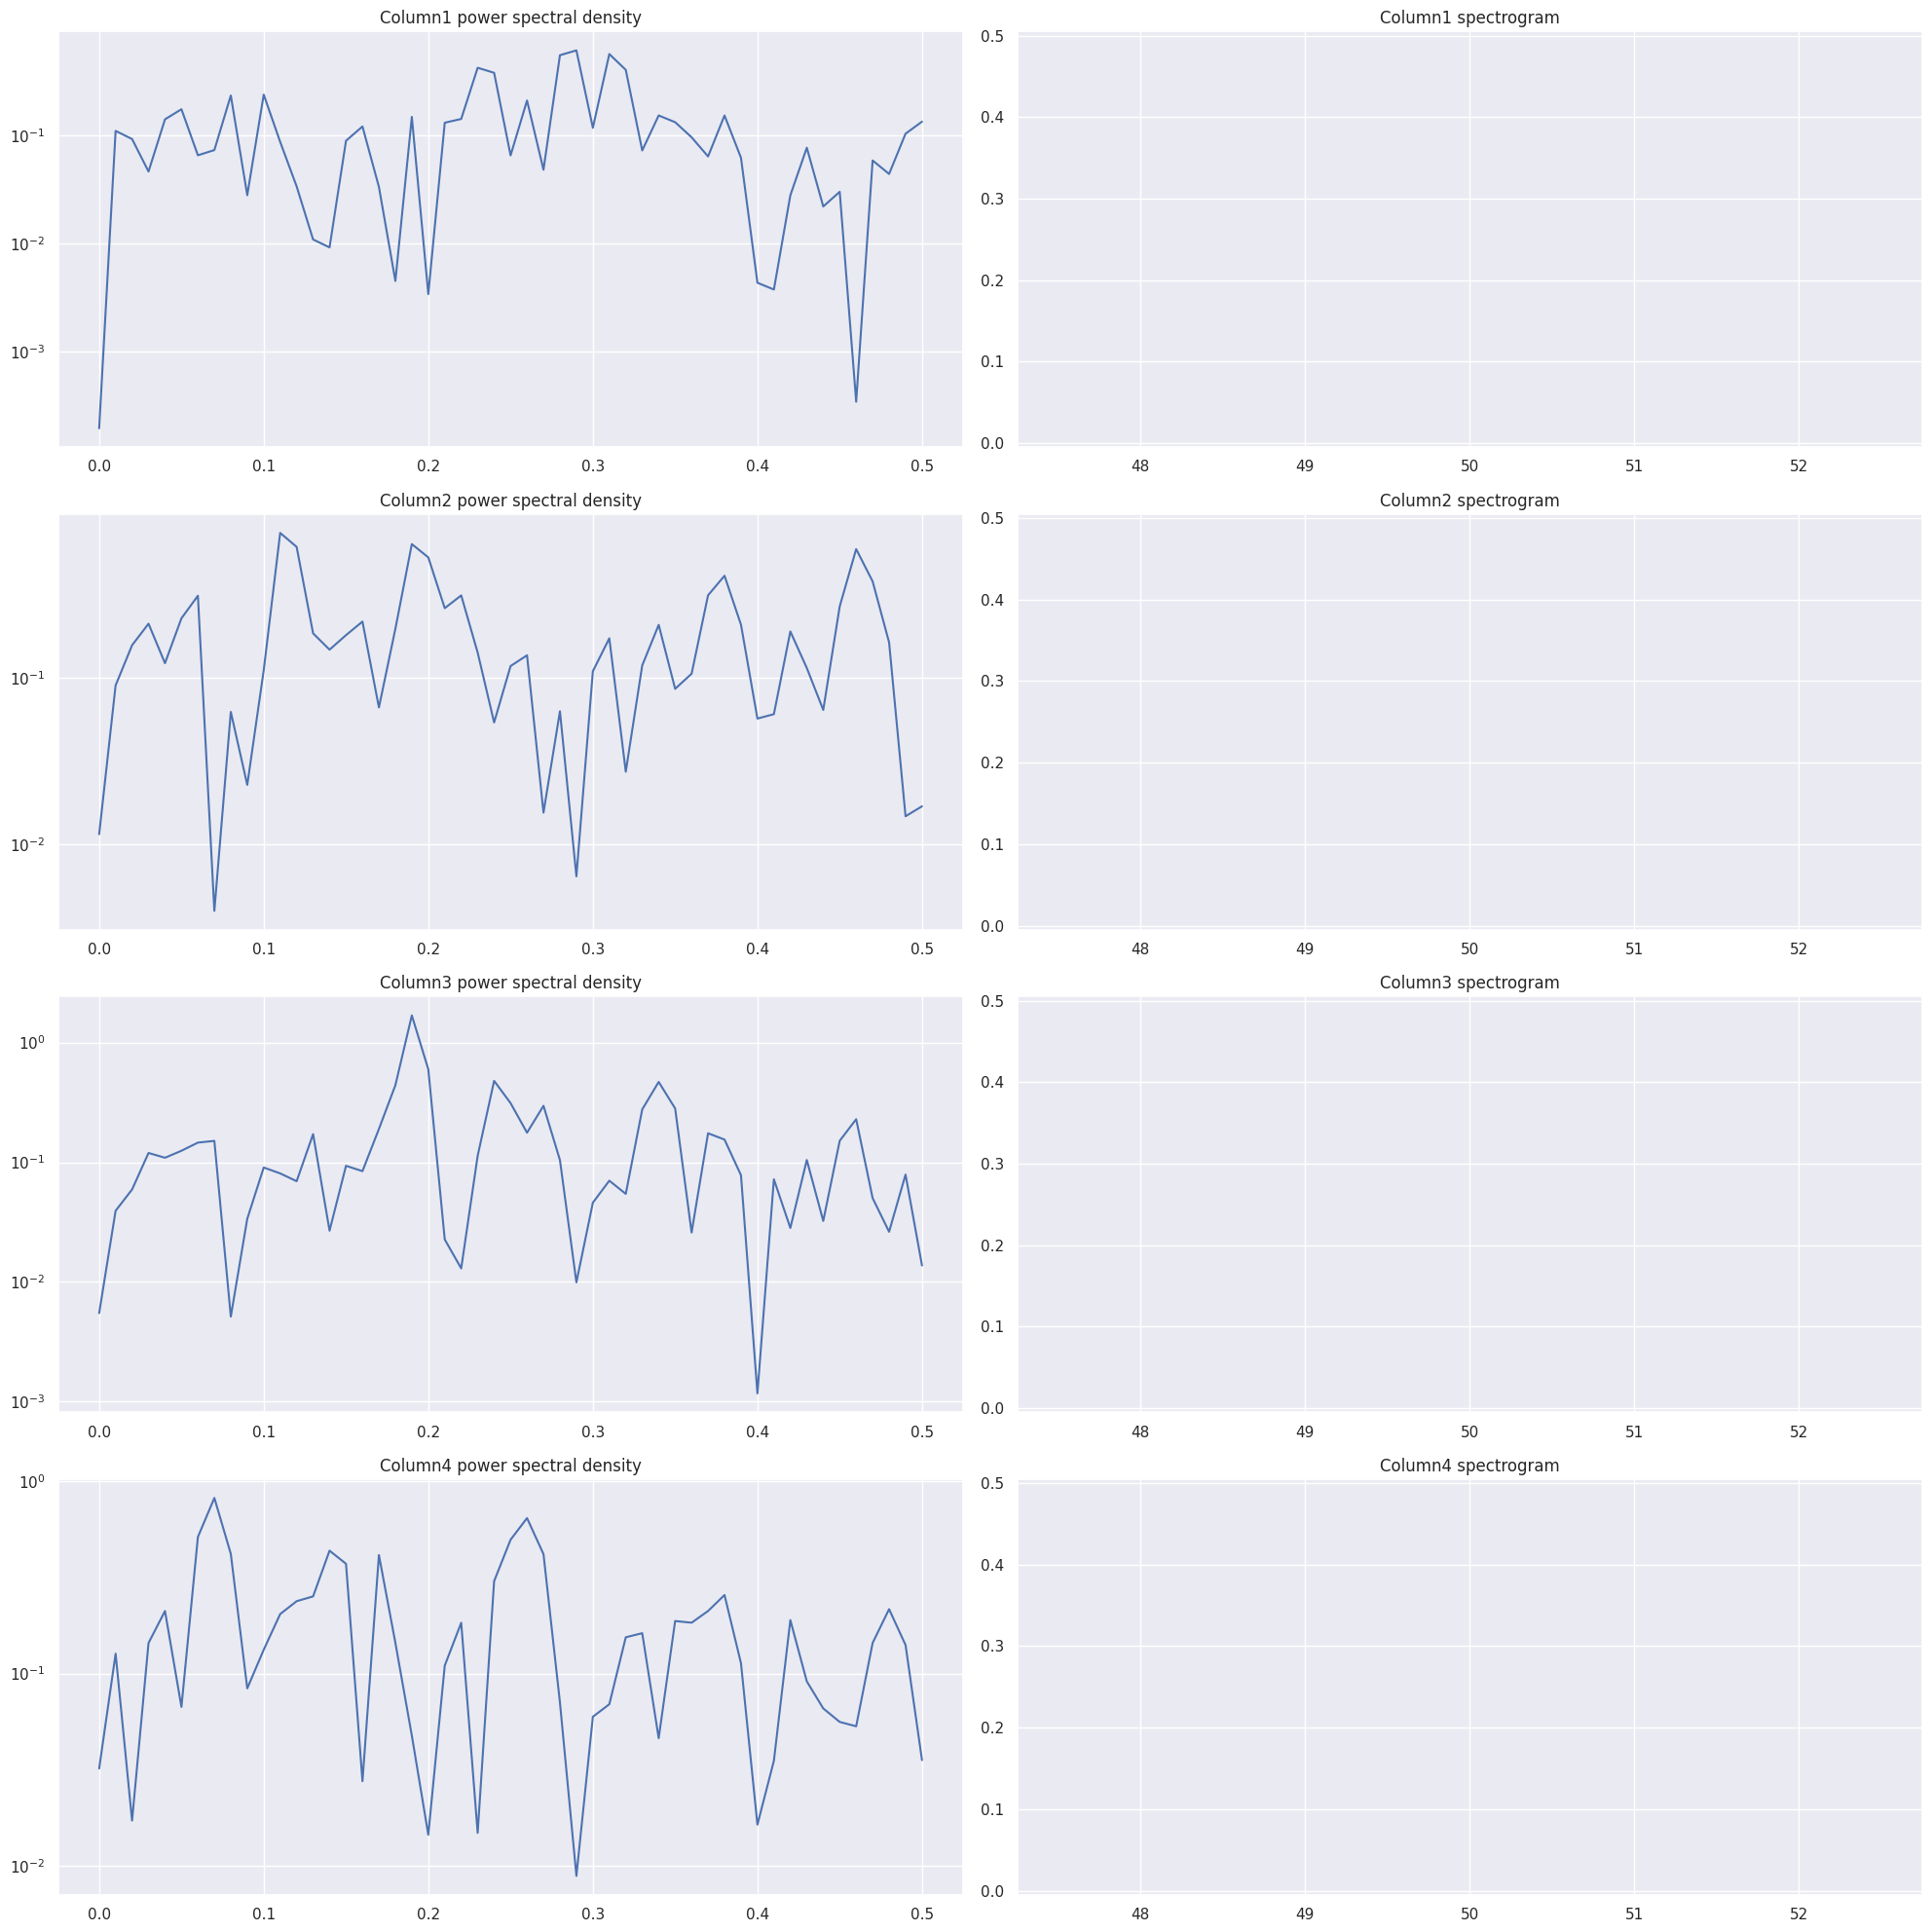

In [57]:
cplmiplo.plot_spectrum(test_df)

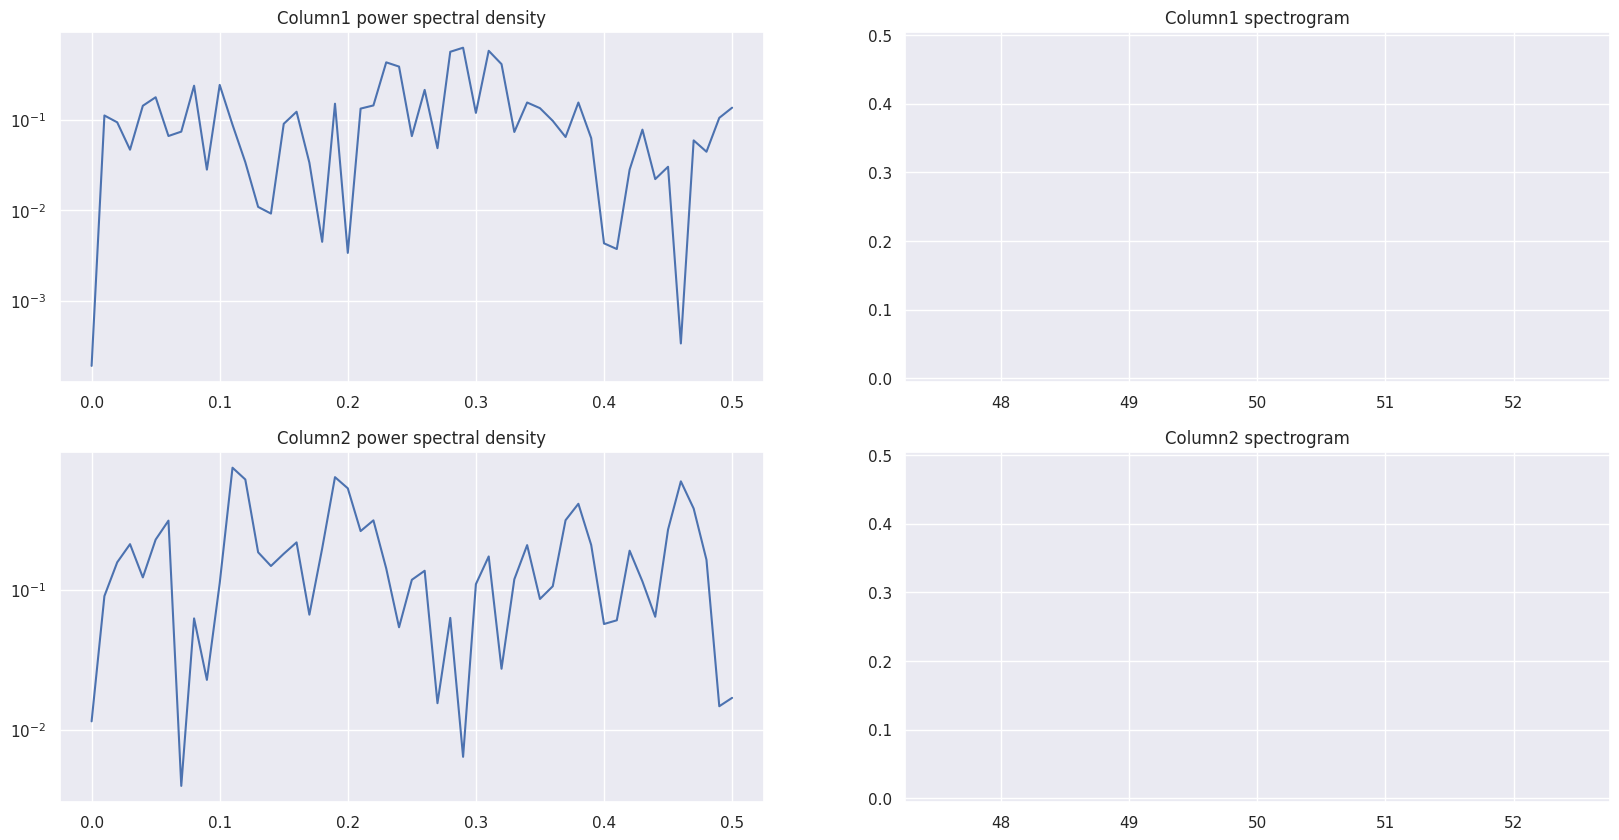

In [58]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## `plot_boxplot()`

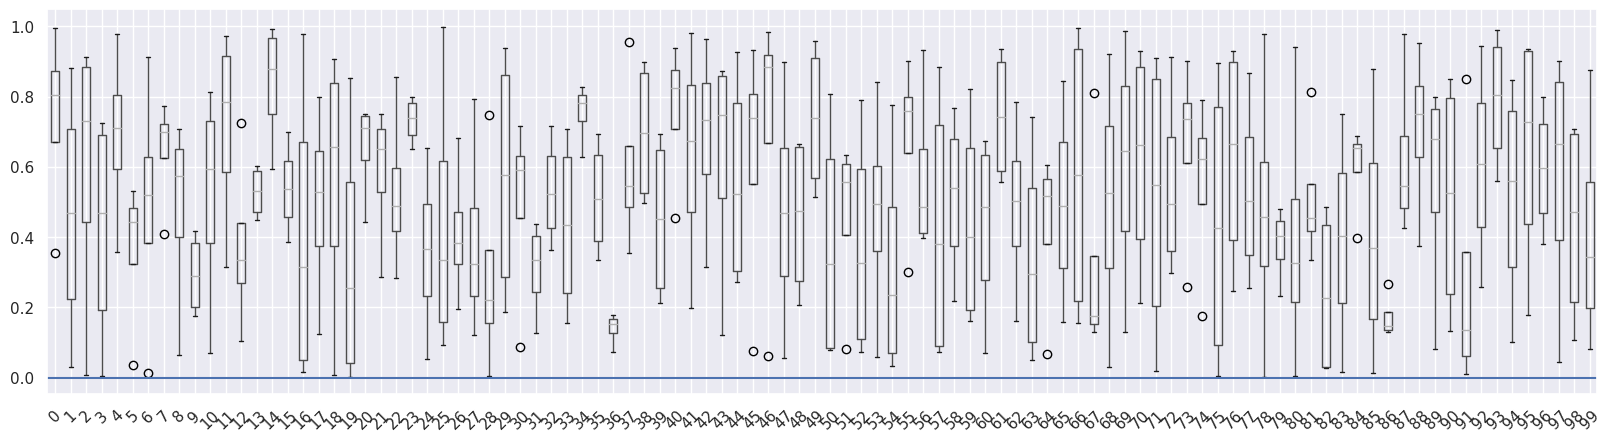

In [59]:
cploboxp.plot_boxplot(test_df)

In [60]:
grouping = "by_col"
ylabel = "Test Label"

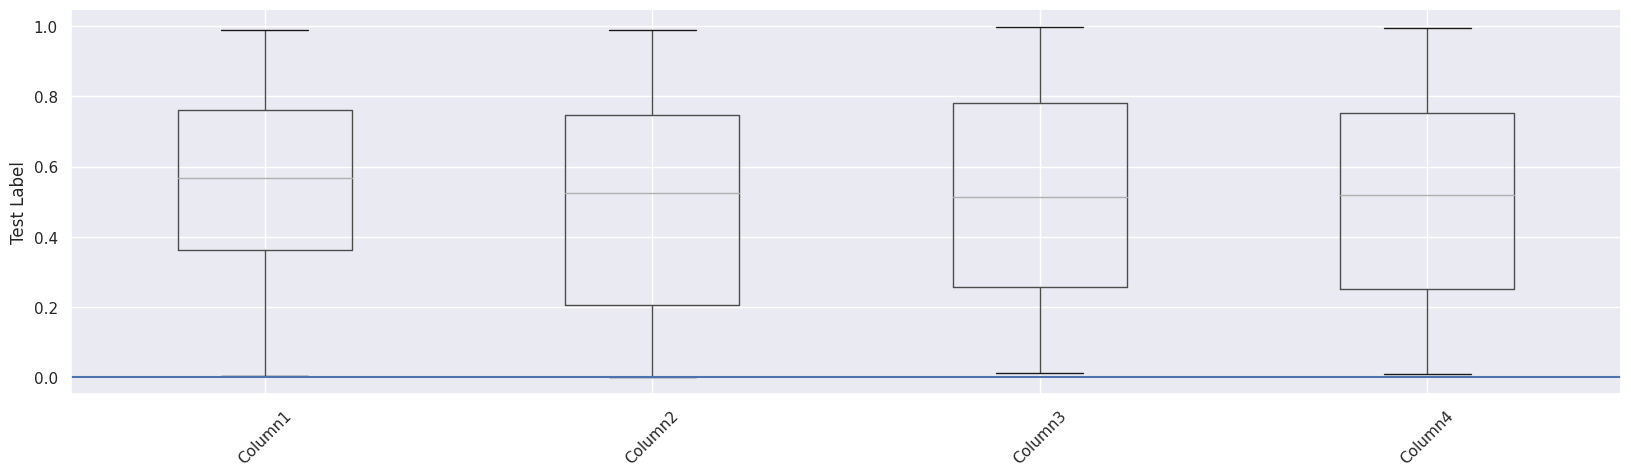

In [61]:
cploboxp.plot_boxplot(test_df, grouping=grouping, ylabel=ylabel)

## `plot_qq()`

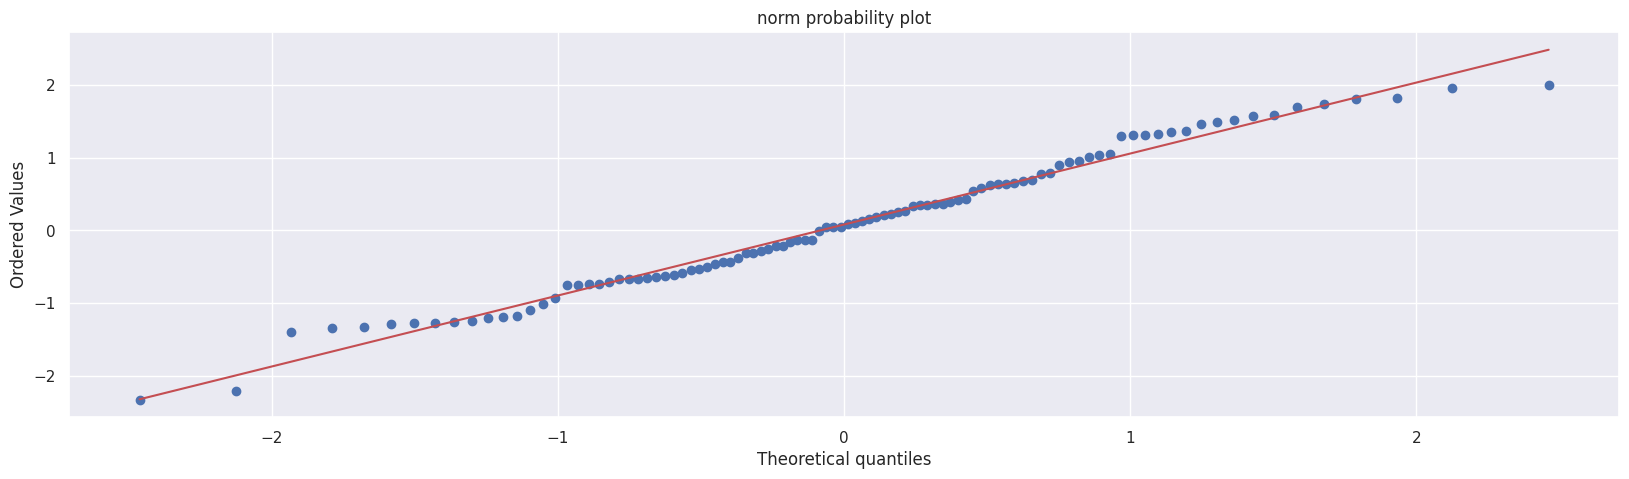

In [62]:
cplonorm.plot_qq(test_srs)

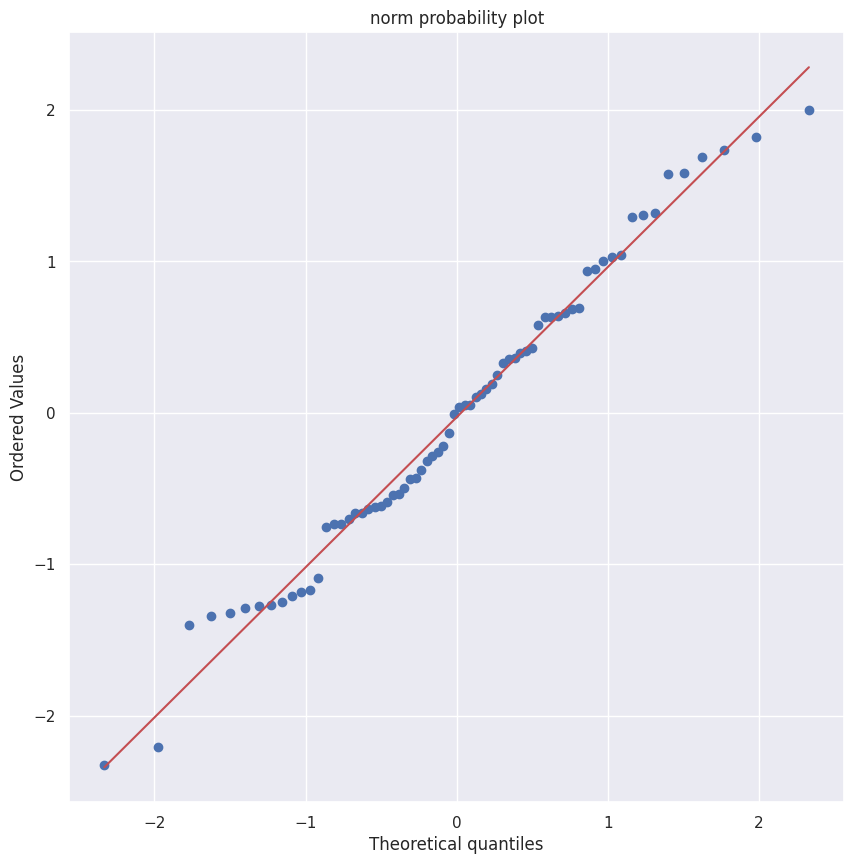

In [63]:
test_series[20:50] = np.nan
_, axes = plt.subplots(1, 1, figsize=(10, 10))
cplonorm.plot_qq(test_series, ax=axes, dist="norm", nan_mode="drop")